In [1]:
import warnings
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, kendalltau
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.exceptions import ConvergenceWarning
from tqdm import tqdm

sns.set_theme(
    context='notebook', 
    rc={'figure.figsize':(4,3)},
)

deep = sns.color_palette('deep')
palette = ([deep[2], deep[1], deep[3]])
color = deep[0]

In [2]:
df = pd.read_csv('datasets/Original.csv', index_col=0)
df = df.drop(columns=['Patient Id'])
df = df.astype({'Gender': 'category'})
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
index,,,,,,,,,,,,,,,,,,,,,
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1000 non-null   int64   
 1   Gender                    1000 non-null   category
 2   Air Pollution             1000 non-null   int64   
 3   Alcohol use               1000 non-null   int64   
 4   Dust Allergy              1000 non-null   int64   
 5   OccuPational Hazards      1000 non-null   int64   
 6   Genetic Risk              1000 non-null   int64   
 7   chronic Lung Disease      1000 non-null   int64   
 8   Balanced Diet             1000 non-null   int64   
 9   Obesity                   1000 non-null   int64   
 10  Smoking                   1000 non-null   int64   
 11  Passive Smoker            1000 non-null   int64   
 12  Chest Pain                1000 non-null   int64   
 13  Coughing of Blood         1000 non-null   int64  

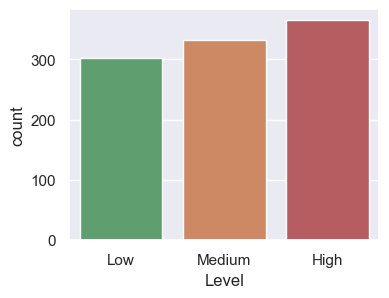

In [24]:
ax = sns.countplot(data=df, x='Level', palette=palette)

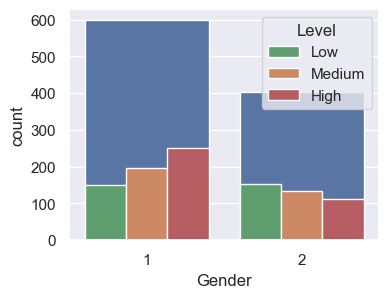

In [25]:
ax = sns.countplot(data=df, x='Gender', color=color)
ax = sns.countplot(data=df, x='Gender', hue='Level', palette=palette, ax=ax)

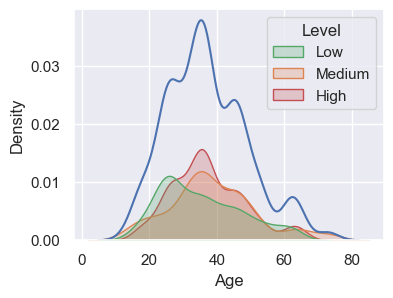

In [26]:
ax = sns.kdeplot(data=df, x='Age', fill=False, color=color)
ax = sns.kdeplot(data=df, x='Age', hue='Level', fill=True, palette=palette, ax=ax)

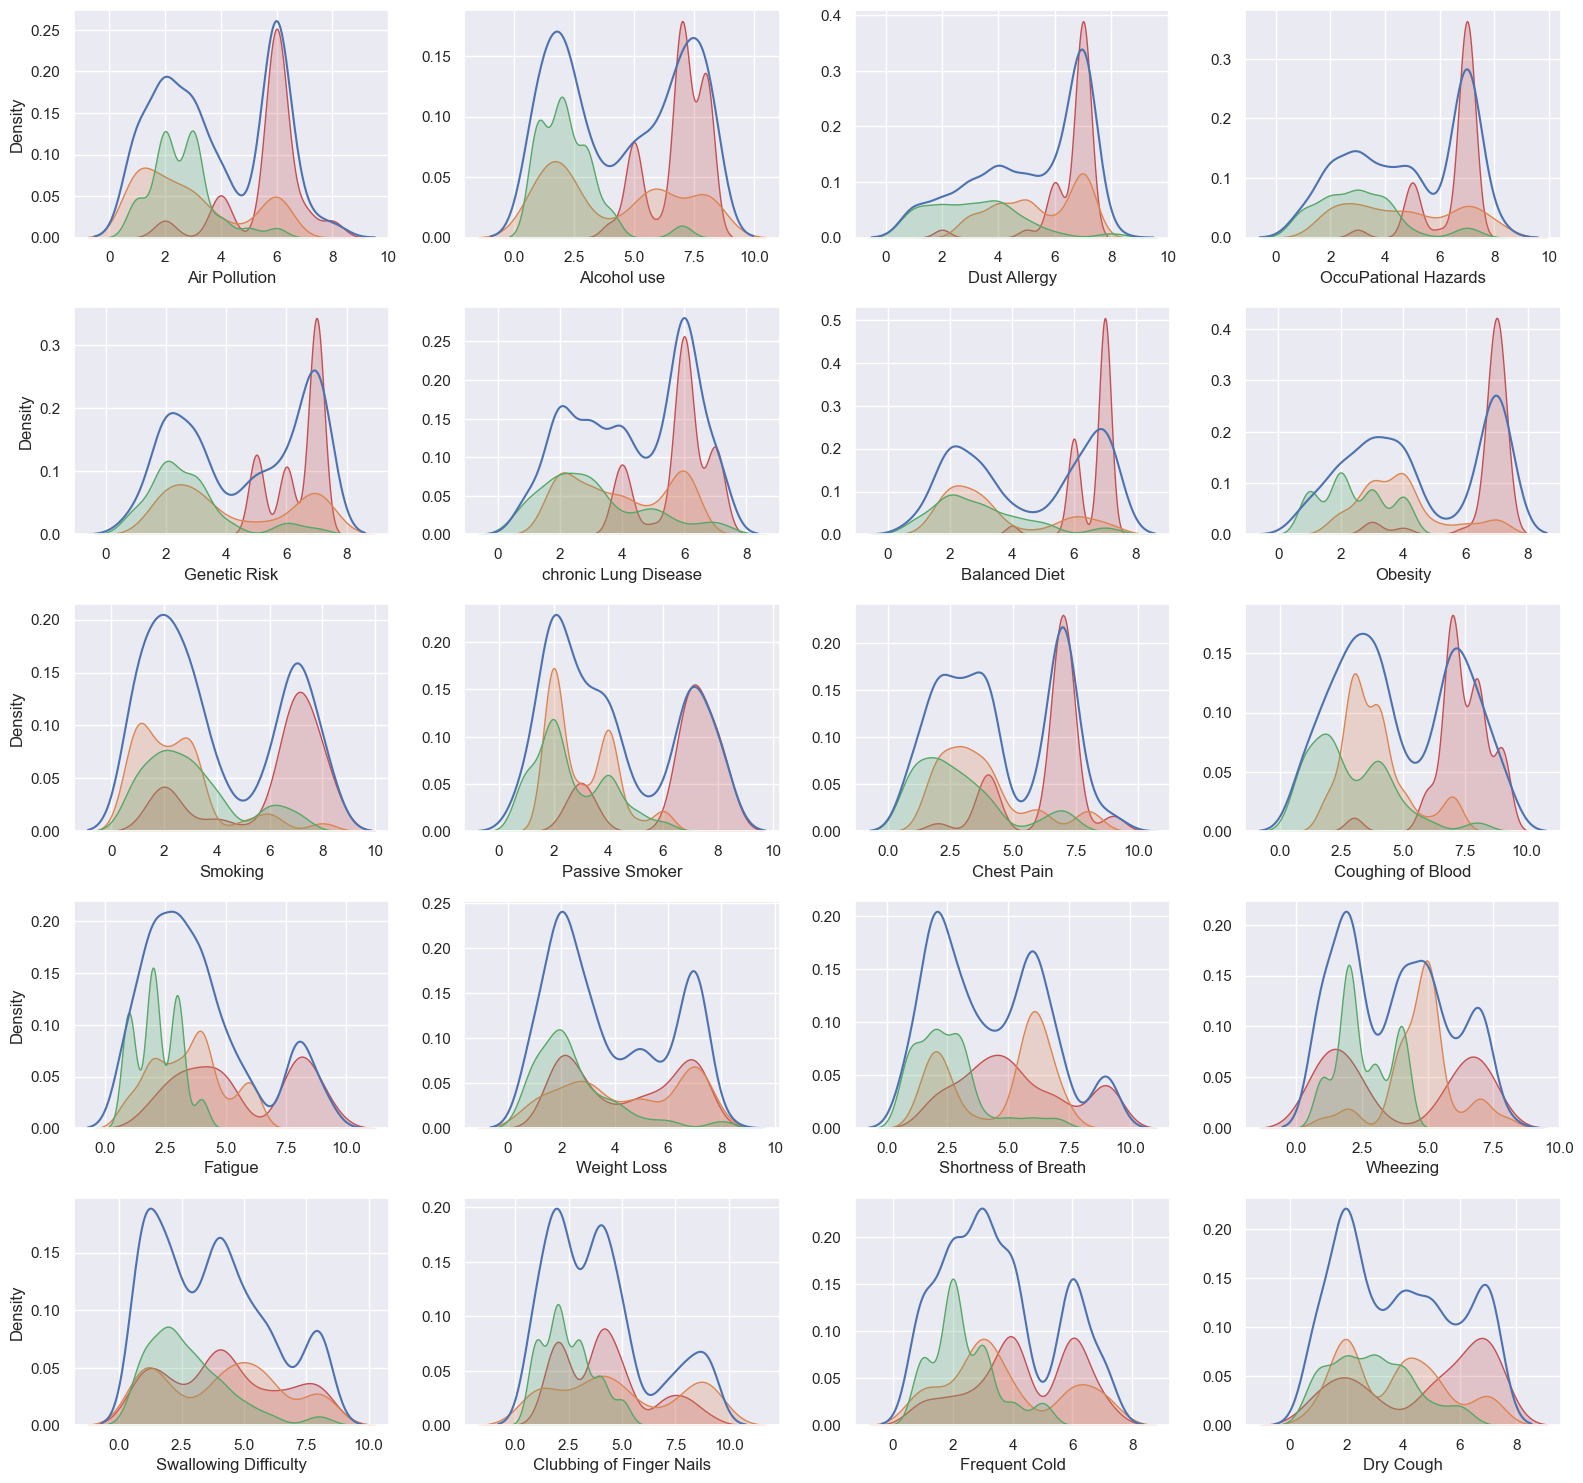

In [27]:
fig, axes = plt.subplots(5, 4, figsize=(16, 15))
for i, col in enumerate(df.columns[2:-2]):
    ax = axes[i//4, i%4]
    sns.kdeplot(data=df, x=col, fill=False, color=color, ax=ax)
    sns.kdeplot(data=df, x=col, hue='Level', fill=True, palette=palette, ax=ax, legend=False)
    if i%4 != 0:
        ax.set_ylabel(None)

fig.tight_layout()

/usr/local/Caskroom/mambaforge/base/envs/roche/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


<AxesSubplot: xlabel='x', ylabel='y'>

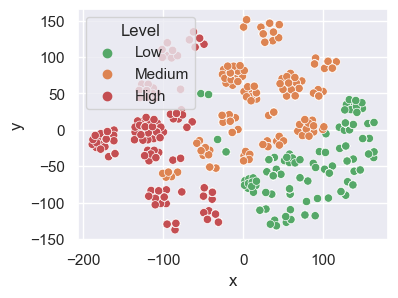

In [38]:
X = df.drop(columns=['Level']).values
X = MinMaxScaler().fit_transform(X)
X = TSNE(n_components=2, perplexity=50, learning_rate='auto', init='pca', n_jobs=-1).fit_transform(X)
df_tsne = pd.DataFrame(X, columns=['x', 'y'])
df_tsne['Level'] = df['Level']
sns.scatterplot(data=df_tsne, x='x', y='y', hue='Level', palette=palette)

<AxesSubplot: >

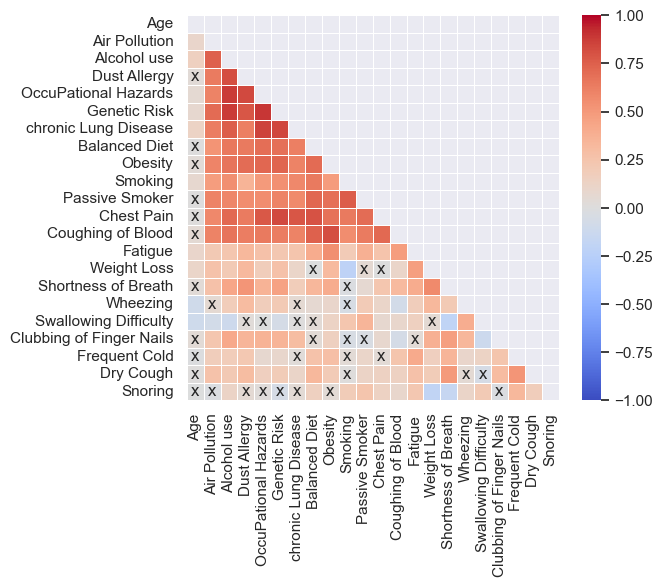

In [80]:
method = 'pearson'
alpha = 0.05
corr_method = {
    'pearson': pearsonr,
    'kendall': kendalltau,
    'spearman': spearmanr
}[method]
df_corr = df.corr(method='pearson', numeric_only=True)
pval = (df.drop(columns=['Gender', 'Level']).corr(method=lambda x, y: corr_method(x, y)[1]) - np.eye(len(df.columns) - 2))
annot = pval.applymap(lambda x: '' if x < alpha else 'x')
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(df_corr, vmin=-1, vmax=1, cmap='coolwarm', mask=mask, linewidths=.5, annot=annot, fmt='', ax=ax)

In [4]:
feature_groups = {
    'Environmental': ['Air Pollution', 'OccuPational Hazards', 'Passive Smoker'],
    'Lifestyle': ['Alcohol use', 'Balanced Diet', 'Smoking'],
    'Physical': ['Age', 'Gender', 'Dust Allergy', 'Genetic Risk', 'chronic Lung Disease', 'Obesity'],
    'Symptoms': ['Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 
            'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring']
}

In [5]:
warnings.filterwarnings('ignore', category=ConvergenceWarning)

label_encoder = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

y = df['Level'].map(label_encoder).values
df_acc = pd.DataFrame(columns=['Feature Group', 'Accuracy', 'Trial'])

for L in range(1, len(feature_groups) + 1):
    for subset in itertools.combinations(feature_groups, L):
        print(subset)
        for trial in tqdm(range(10)):
            features = sum([feature_groups[group] for group in subset], [])
            X = df[features].values
            X = MinMaxScaler().fit_transform(X)
            X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=trial)
            model = MLPClassifier(hidden_layer_sizes=16, activation='relu', batch_size=32, alpha=0, learning_rate_init=0.001, max_iter=100, random_state=trial)
            model.fit(X_train, y_train)
            acc = model.score(X_val, y_val)
            df_acc = pd.concat([df_acc, pd.DataFrame({'Feature Group': ' + '.join(subset), 'Accuracy': acc, 'Trial': 0}, index=[0])], ignore_index=True)

('Environmental',)


100%|██████████| 10/10 [00:04<00:00,  2.29it/s]


('Lifestyle',)


100%|██████████| 10/10 [00:04<00:00,  2.30it/s]


('Physical',)


100%|██████████| 10/10 [00:04<00:00,  2.26it/s]


('Symptoms',)


100%|██████████| 10/10 [00:04<00:00,  2.49it/s]


('Environmental', 'Lifestyle')


100%|██████████| 10/10 [00:03<00:00,  2.55it/s]


('Environmental', 'Physical')


100%|██████████| 10/10 [00:04<00:00,  2.45it/s]


('Environmental', 'Symptoms')


100%|██████████| 10/10 [00:04<00:00,  2.49it/s]


('Lifestyle', 'Physical')


100%|██████████| 10/10 [00:04<00:00,  2.39it/s]


('Lifestyle', 'Symptoms')


100%|██████████| 10/10 [00:04<00:00,  2.15it/s]


('Physical', 'Symptoms')


100%|██████████| 10/10 [00:04<00:00,  2.09it/s]


('Environmental', 'Lifestyle', 'Physical')


100%|██████████| 10/10 [00:04<00:00,  2.15it/s]


('Environmental', 'Lifestyle', 'Symptoms')


100%|██████████| 10/10 [00:04<00:00,  2.22it/s]


('Environmental', 'Physical', 'Symptoms')


100%|██████████| 10/10 [00:04<00:00,  2.22it/s]


('Lifestyle', 'Physical', 'Symptoms')


100%|██████████| 10/10 [00:04<00:00,  2.20it/s]


('Environmental', 'Lifestyle', 'Physical', 'Symptoms')


100%|██████████| 10/10 [00:04<00:00,  2.21it/s]


In [44]:
df_acc_agg = df_acc.groupby('Feature Group', sort=False)['Accuracy'].agg(['mean', 'std'])#.sort_values('mean', key=lambda col: col.map(lambda x: ), ascending=False)
df_acc_agg['key'] = df_acc_agg.reset_index().apply(lambda row: row['Feature Group'].count('+') * 100 + row['mean'], axis=1).values
df_acc_agg = df_acc_agg.sort_values('key', ascending=True).drop(columns='key')
df_acc_agg['Accuracy'] = df_acc_agg['mean'].map(lambda x: f'{x:.2f} ± {df_acc_agg.loc[df_acc_agg["mean"] == x, "std"].values[0]:.2f}')
df_acc_agg = df_acc_agg.drop(columns=['mean', 'std'])
df_acc_agg

,Accuracy
Feature Group,
Lifestyle,0.69 ± 0.07
Environmental,0.74 ± 0.03
Physical,0.81 ± 0.04
Symptoms,0.97 ± 0.01
Environmental + Lifestyle,0.82 ± 0.03
Lifestyle + Physical,0.87 ± 0.03
Environmental + Physical,0.89 ± 0.03
Lifestyle + Symptoms,0.98 ± 0.01
Environmental + Symptoms,0.99 ± 0.01
